<a href="https://colab.research.google.com/github/rkt10952/Machine-Learning-public-/blob/master/fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as t
import numpy as np
from tensorflow import keras

creating callbacks

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(Self,epoch,logs={}):
    if(logs.get('acc')>0.9):
      print('95% accuracy reached abort training')
      Self.model.stop_training = True

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_lables)=fashion_mnist.load_data()

viewing sata sample

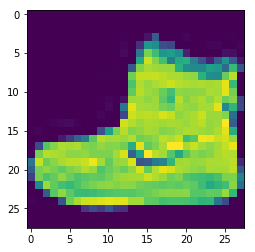

In [44]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

Normalizing our dataset

In [0]:
train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)
train_images,test_images=train_images/225.0,test_images/255

defining our model

In [53]:
model = keras.Sequential([
    keras.layers.Conv2D(64,(3,3),activation = 'relu',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               1384576   
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


seeing our training images

compiling model with optimizer and loss function

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


training our model

In [55]:
callbacks = myCallback()
model.fit(train_images,train_labels,epochs = 50,callbacks = [callbacks])

Epoch 1/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3736 - acc: 0.8664
Epoch 2/50
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2506 - acc: 0.9081
Epoch 3/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2047 - acc: 0.9240
Epoch 4/50
60000/60000 [==============================] - 6s 98us/sample - loss: 0.1716 - acc: 0.9356
Epoch 5/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1415 - acc: 0.9469
Epoch 6/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.1186 - acc: 0.9559


evaluating our model

In [56]:
model.evaluate(test_images,test_lables)

10000/10000 [==============================] - 1s 76us/sample - loss: 0.2597 - acc: 0.9142


[0.2597062891066074, 0.9142]